# 1. Import Hourly Data

In [1]:
#----------- Part-1: Daily Data  ['Date']>'2013-12-31' & ['Date']<'2016-01-01'
#----------- Part-2: Weekly Data  , Monday-Sunday-Sum ,  plot  ,  noise
#----------- Part-3: Polynomial
#----------- Part-4: 

#----------- Other Questions

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, date, timedelta
import warnings
warnings.filterwarnings('ignore')

with open('hourly_data.json','rb') as f:
    data=f.readlines()
hourly_data = json.loads(data[0])

print "import done"

import done


# 2. Create Daily Data

In [2]:
#----------- Part-1: Daily Data


#------- Calculate Daily Count from Hourly Data
dict_sum=lambda one_dict,start,end: dict((str(k),sum(one_dict[k])) for k in one_dict.keys()[start:end])

daily_data=dict_sum(hourly_data,0,len(hourly_data.keys()))


print daily_data.items()[0]

('2014-06-30', 25981)


In [3]:
#----------- Part-1: Daily Data  ['Date']>'2013-12-31' & ['Date']<'2016-01-01'

# Date-Count

raw_data = []
for key,value in daily_data.items():
    raw_data.append((key,value))

data_df = pd.DataFrame(raw_data, columns=['Date','#_of_parking'])


#        Year  Week#  Weekday
# 0      2014     27        1
# Decompose Date to Year, Week# & Weekday
pk_df = pd.DataFrame(map(lambda x: x.isocalendar(), pd.to_datetime(data_df['Date'])), columns=['Year','Week#','Weekday'])

# len(pk_df)=27768
pk_df['Date']=data_df['Date']
pk_df['#_of_parking']=data_df['#_of_parking']
            

# len(use_data_df)=18264
# Based on 'Basic_Static.ipynb: part-7' Ignore data of year 2012 & 2013
# len(use_data_df)=761
use_data_df = pk_df[(pk_df['Date']>'2013-12-31') ]

# len(data_train_new)=730
data_train_new = use_data_df[use_data_df['Date']<'2016-01-01']

# Test data
data_test_new = use_data_df[use_data_df['Date']>='2016-01-01']

print data_train_new.head()

    Year  Week#  Weekday        Date  #_of_parking
0   2014     27        1  2014-06-30         25981
1   2014     42        4  2014-10-16         28203
4   2015     47        4  2015-11-19         28110
12  2015     46        6  2015-11-14          1223
15  2014     42        3  2014-10-15         29487


# 3. Make Weekly Data

In [4]:
#----------- Part-2: Weekly Data： Monday-Sunday-Sum

#  Year  Week#  #_of_parking
#  2014     27   25981

# Test Weekly Data
raw_data=data_train_new.loc[:,['Year','Week#','#_of_parking']]
weekly_data=raw_data.groupby(['Year','Week#']).sum()

# Test Weekly Data
raw_data_test=data_test_new.loc[:,['Year','Week#','#_of_parking']]
weekly_data_test=raw_data_test.groupby(['Year','Week#']).sum()


weekly_data_test.head()

#_of_parking
Year Week#              
2015 53             3088
2016 1            124153
     2            141431
     3            130310
     4            133179

In [5]:
weekly_data.describe()

,#_of_parking
count,105.000000
mean,125421.828571
std,25258.429799
min,27158.000000
25%,123529.000000
50%,132118.000000
75%,140141.000000
max,152588.000000


# 4. Visualize & Outlier

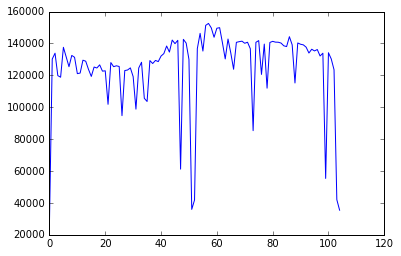

In [5]:
# Plot Weekly Data

w=np.arange(0,105,1)
plt.plot(w,weekly_data['#_of_parking'])

In [70]:
# Outlier
# 1. outlier
# 2. Week & Date of outlier
# 3. Regression      delete->regression->recover

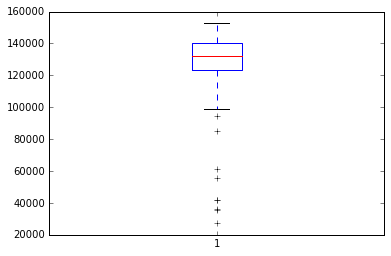

In [7]:
# 1. outlier

r=plt.boxplot(weekly_data['#_of_parking'])
                      
bottom_points = r["fliers"][0].get_data()[1]
# bottom_points = r["fliers"][2].get_data()[1]
                    

In [8]:
bottom_points

array([27158, 94735, 61188, 35945, 41826, 85320, 55360, 42041, 35434])

In [9]:
# 2. Week & Date of outlier

for i in bottom_points:
    print weekly_data[(weekly_data['#_of_parking'] == i)]

            #_of_parking
Year Week#              
2014 1             27158
            #_of_parking
Year Week#              
2014 27            94735
            #_of_parking
Year Week#              
2014 48            61188
            #_of_parking
Year Week#              
2014 52            35945
            #_of_parking
Year Week#              
2015 1             41826
            #_of_parking
Year Week#              
2015 22            85320
            #_of_parking
Year Week#              
2015 48            55360
            #_of_parking
Year Week#              
2015 52            42041
            #_of_parking
Year Week#              
2015 53            35434


# Try: 5. Linear & Robust Linear Regression

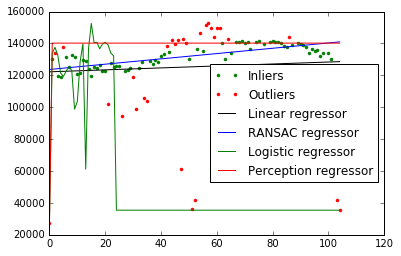

In [210]:
# 3. Regression      
# Robust Regression
#
# http://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors
from sklearn import linear_model

# Train Data
y=weekly_data['#_of_parking'].values
X=np.arange(0,len(y))
X=X.reshape((105,1))

# # Test Data
# y_test=weekly_data_test['#_of_parking'].values
# X_test=np.arange(0,len(y_test))
# X_test=X_test.reshape((len(X_test,1))

# ------- LinearRegression
model = linear_model.LinearRegression()
model.fit(X, y)


# ------- Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# --------
# ------- Ridge
# m_ridge = linear_model.Ridge (alpha = .5)
# m_ridge.fit(X,y)
# m_lasso = linear_model.Lasso(alpha=0.1)
# m_lasso.fit(X,y)
# m_lasso_multi = linear_model.MultiTaskLasso(alpha=1.)
# m_lasso_multi.fit(X,y) #ValueError: For mono-task outputs, use ElasticNet
# m_lasso_lars = linear_model.LassoLars(alpha=0.1)
# m_lasso_lars.fit(X,y)
m_bayes = linear_model.BayesianRidge()
m_bayes.fit(X,y)
m_logistic = linear_model.LogisticRegression()
m_logistic.fit(X,y)
m_per = linear_model.Perceptron()
m_per.fit(X,y)


# Predict data of estimated models
line_X = np.arange(0, 105)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# --------
# ------- Ridge
# line_y_ridge = m_ridge.predict(line_X[:, np.newaxis])
# line_y_lasso = m_lasso.predict(line_X[:, np.newaxis])
# line_y_lasso_muulti = m_lasso_multi.predict(line_X[:, np.newaxis])
line_y_bayes = m_bayes.predict(line_X[:, np.newaxis])
line_y_logistic = m_logistic.predict(line_X[:, np.newaxis])
line_y_per = m_per.predict(line_X[:, np.newaxis])


plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear regressor')
plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
# --------
# ------- Ridge
# plt.plot(line_X, line_y_ridge, '-r', label='Ridge regressor')
# plt.plot(line_X, line_y_lasso, '-g', label='Lasso regressor')
plt.plot(line_X, line_y_logistic, '-g', label='Logistic regressor')
plt.plot(line_X, line_y_per, '-r', label='Perception regressor')


plt.legend(loc='right')
plt.show()

# Try: 6. Polynomial + Robust

Score of Polynomial 3: -0.01
Score of Polynomial 5: -0.05


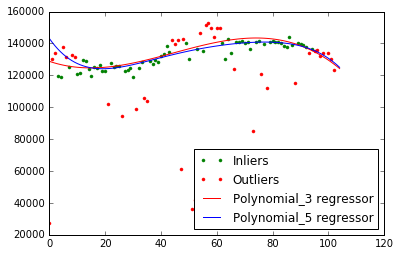

In [11]:
# 3. Regression   OOOOk
# Robust Regression  + polynomial  
# MSE
#
# http://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Train Data
y=weekly_data['#_of_parking'].values
X=np.arange(0,len(y))
X=X.reshape((105,1))
line_X = np.arange(0, 105)


# Test Data
# y_test=weekly_data_test['#_of_parking'].values
# X_test=np.arange(0,len(y_test))
# X_test=X_test.reshape((len(X_test,1))



# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)
line_y = model.predict(line_X[:, np.newaxis])


# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


# Polynomial-3
model_poly = make_pipeline(PolynomialFeatures(3),model_ransac )
model_poly.fit(X, y)
line_y_poly = model_poly.predict(line_X[:, np.newaxis])
print 'Score of Polynomial 3: %.2f'%model_poly.score(X,y)

# Polynomial-5
model_poly_5 = make_pipeline( PolynomialFeatures(5),model_ransac )
model_poly_5.fit(X, y)
line_y_poly_5 = model_poly_5.predict(line_X[:, np.newaxis])
print 'Score of Polynomial 5: %.2f'%model_poly_5.score(X,y)


plt.plot(X[inlier_mask], y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], y[outlier_mask], '.r', label='Outliers')
# plt.plot(line_X, line_y, '-k', label='Linear regressor')
# plt.plot(line_X, line_y_ransac, '-b', label='RANSAC regressor')
plt.plot(line_X, line_y_poly, '-r', label='Polynomial_3 regressor')
plt.plot(line_X, line_y_poly_5, '-b', label='Polynomial_5 regressor' )
# plt.plot(line_X, line_y_poly, '-r', label='%s: error = %.3f' % ('Polynomial_3 regressor', mse_poly))
# plt.plot(line_X, line_y_poly_5, '-b', label='%s: error = %.3f' % ('Polynomial_5 regressor', mse_poly_5))
plt.legend(loc='lower right')
plt.show()

In [159]:
mse_ln = metrics.mean_squared_error(line_y, y)
mse_ransac = metrics.mean_squared_error(line_y_ransac, y)
mse_poly = metrics.mean_squared_error(line_y_poly, y)
mse_poly_5 = metrics.mean_squared_error(line_y_poly_5, y)

print 'MSE of Linear Regression: %.3f'%mse_ln
print 'MSE of Robust Linear Regression: %.3f'%mse_ransac
print 'MSE of Polynomial_3 Robust Regression: %.3f'%mse_poly
print 'MSE of Polynomial_5 Robust Regression: %.3f'%mse_poly_5

MSE of Linear Regression: 628450862.424
MSE of Robust Linear Regression: 693034434.456
MSE of Polynomial_3 Robust Regression: 646807385.445
MSE of Polynomial_5 Robust Regression: 624750600.682


In [133]:
# Not work
#
# from sklearn import linear_model, metrics
# mse_ln = metrics.mean_squared_error(model.predict(X_test), y_test)
# line_X_test = np.arange(0, len(y_test))
# model_ransac.predict(line_X_test[:, np.newaxis])

In [163]:
print 'Score of Linear Regression: %.3f'%model.score(X,y)
print 'Score of Robust Linear Regression: %.3f'%model_ransac.score(X,y)
# print 'Score of Polynomial_3 Robust Regression: %.3f'%model_poly.score(X,y)
# print 'Score of Polynomial_5 Robust Regression: %.3f'%model_poly_5.score(X,y)

Score of Linear Regression: 0.005
Score of Robust Linear Regression: -0.138


# Try: 7. MSE Comparation: Polynomial+Linear

Automatically created module for IPython interactive environment
[ -1.06211127e+03   3.83789639e+01  -2.93681644e-01]
[  2.59247743e+03  -1.10310609e+02   1.60245313e+00  -4.29172847e-03
  -3.33367683e-05]
[  7.62211547e-26  -1.31077714e-13  -5.93275181e-17   2.08983932e-21
   4.28620662e-19   1.67240382e-17   5.85091496e-16   1.74391752e-14
   3.99882159e-13   5.39488696e-12  -3.04111831e-13   6.85874405e-15
  -7.73774414e-17   4.36460974e-19  -9.84382640e-22]


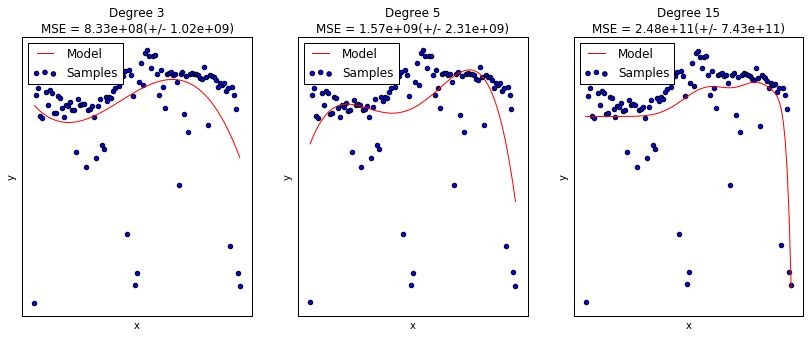

In [12]:
# Just Polynomial
#

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

# np.random.seed(0)
# n_samples = 30
degrees = [3, 5, 15]

# true_fun = lambda X: np.cos(1.5 * np.pi * X)
# X = np.sort(np.random.rand(n_samples))
# y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Train Data
y=weekly_data['#_of_parking'].values
X=np.arange(0,len(y))
# X=X.reshape((105,1))
# line_X = np.arange(0, 105)


# Test Data
y_test=weekly_data_test['#_of_parking'].values
X_test=np.arange(0,len(y_test))
# X_test=X_test.reshape((len(X_test,1))



plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    print(pipeline.named_steps["linear_regression"].coef_)
    

    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()



# 8. MSE Comparation: Polynomial+Robust

Automatically created module for IPython interactive environment


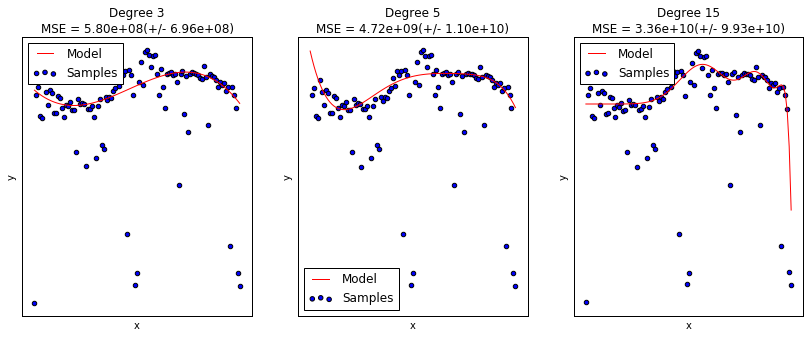

In [13]:
# Polynomial ＋ Robust

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

# np.random.seed(0)
# n_samples = 30
degrees = [3, 5, 15]

# true_fun = lambda X: np.cos(1.5 * np.pi * X)
# X = np.sort(np.random.rand(n_samples))
# y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Train Data
y=weekly_data['#_of_parking'].values
X=np.arange(0,len(y))
# X=X.reshape((105,1))
# line_X = np.arange(0, 105)


# Test Data
y_test=weekly_data_test['#_of_parking'].values
X_test=np.arange(0,len(y_test))
# X_test=X_test.reshape((len(X_test,1))


#---------- Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
# model_ransac.fit(X, y)
# line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])
# inlier_mask = model_ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)



plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    
#     linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("robust_linear_regression", model_ransac)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    
    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()



## Try: Inlier_R2

Automatically created module for IPython interactive environment
RANSAC+PolynomialDegree:3, rmse=25154.28, R2=-0.00, Inlier_R2=0.77
RANSAC+PolynomialDegree:5, rmse=26231.55, R2=-0.09, Inlier_R2=0.80
RANSAC+PolynomialDegree:15, rmse=23415.81, R2=0.13, Inlier_R2=0.96
RANSAC+PolynomialDegree:20, rmse=22682.02, R2=0.19, Inlier_R2=0.77


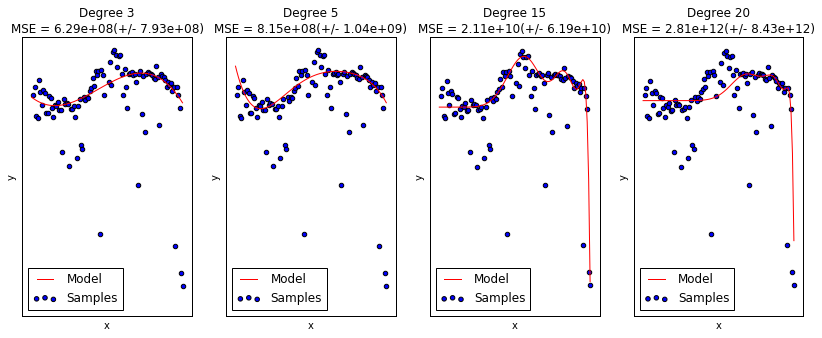

In [14]:
# Polynomial ＋ Robust + Score + Inlier_Score
#
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation

from sklearn.linear_model import Ridge
from scipy.stats import norm
import scipy as sp


def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()



degrees = [3, 5, 15, 20]


# Train Data
y=weekly_data['#_of_parking'].values
X=np.arange(0,len(y))


# Test Data
y_test=weekly_data_test['#_of_parking'].values
X_test=np.arange(0,len(y_test))


#---------- Robustly fit linear model with RANSAC algorithm
# model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())

    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("robust_linear_regression", model_ransac)])
    
    
#     pipeline = Pipeline([("polynomial_features", polynomial_features),
#                          ("ridge_linear_regression", linear_model.Ridge())])
    
    pipeline.fit(X[:, np.newaxis], y)
 

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    
    # MSE & R2 Score
    y_test=pipeline.predict(X[:, np.newaxis])   
    inlier_mask = model_ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)  
    # Inlier_R2_Score
    y_r2_true=y[inlier_mask] #True
    y_r2_predict=y_test[inlier_mask] #Predict
    
    print('RANSAC+PolynomialDegree:%d, rmse=%.2f, R2=%.2f, Inlier_R2=%.2f' %
      (degrees[i],
        rmse(y_test, y),
       R2(y_test, y),
       R2(y_r2_predict,y_r2_true)))
    

    
    
    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()



## Try: 9. 预测未来5周

Automatically created module for IPython interactive environment
RANSAC+PolynomialDegree:3, rmse=25530.02, R2=-0.03, Inlier_R2=0.76
[ 119791.61313083  118053.49160494  116245.58788342  114366.83200657
  112416.1540147 ]
Predict_5w RANSAC+PolynomialDegree:3, rmse=54729.38, R2=-0.11
RANSAC+PolynomialDegree:5, rmse=25938.03, R2=-0.06, Inlier_R2=0.83
[ 130803.89468183  130452.33416947  130120.75549835  129811.51552016
  129527.04356326]
Predict_5w RANSAC+PolynomialDegree:5, rmse=57432.64, R2=-0.22
RANSAC+PolynomialDegree:15, rmse=23337.67, R2=0.14, Inlier_R2=0.95
[ -172740.53864126  -364943.693888    -647321.21502523 -1052592.44865255
 -1622886.05046682]
Predict_5w RANSAC+PolynomialDegree:15, rmse=1036849.46, R2=-397.04
RANSAC+PolynomialDegree:20, rmse=22162.85, R2=0.22, Inlier_R2=0.81
[ -361448.67444804  -735826.48606303 -1331062.78328898 -2251949.11113933
 -3644281.7545872 ]
Predict_5w RANSAC+PolynomialDegree:20, rmse=2144064.27, R2=-1701.03


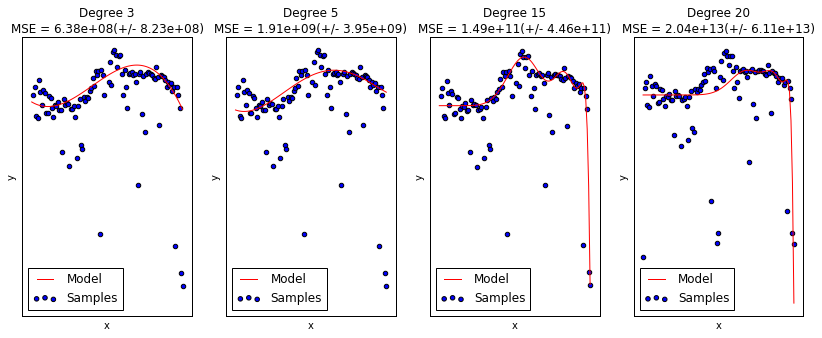

In [22]:
# Polynomial ＋ Robust + Score + Inlier_Score
#
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation

from sklearn.linear_model import Ridge
from scipy.stats import norm
import scipy as sp


def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()



degrees = [3, 5, 15, 20]


# Train Data
y=weekly_data['#_of_parking'].values
X=np.arange(0,len(y))


# Test Data
y_testing=weekly_data_test['#_of_parking'].values
X_testing=np.arange(0,len(y_test))


#---------- Robustly fit linear model with RANSAC algorithm
# model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())

    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("robust_linear_regression", model_ransac)])
    
    
    pipeline.fit(X[:, np.newaxis], y)
 

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    
    # MSE & R2 Score
    y_test=pipeline.predict(X[:, np.newaxis])   
    inlier_mask = model_ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)  
    # Inlier_R2_Score
    y_r2_true=y[inlier_mask] #True
    y_r2_predict=y_test[inlier_mask] #Predict
    
    print('RANSAC+PolynomialDegree:%d, rmse=%.2f, R2=%.2f, Inlier_R2=%.2f' %
      (degrees[i],
        rmse(y_test, y),
       R2(y_test, y),
       R2(y_r2_predict,y_r2_true)))
    
    #----------
    # Predict future 5 weeks
    X_5w = np.arange(106,111)
    y_predict_5w = pipeline.predict(X_5w[:, np.newaxis]) 
    # y_testing = array([  3088, 124153, 141431, 130310, 133179])
    
#     print y_predict_5w
    
    print('Predict_5w RANSAC+PolynomialDegree:%d, rmse=%.2f, R2=%.2f' %
      (degrees[i],
        rmse(y_predict_5w, y_testing),
       R2(y_predict_5w, y_testing)))
    
    
    #----------
    
    
    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()



## Try: 10. Implement Polynomial Degree5&Robust-train/test-predict future 5w

Automatically created module for IPython interactive environment
RANSAC+PolynomialDegree:5, validate_rmse=186685.63, validate_R2=-36.44, train_R2=-0.14
Predict_5w RANSAC+PolynomialDegree:5, predict_rmse=589277.85, predict_R2=-127.57


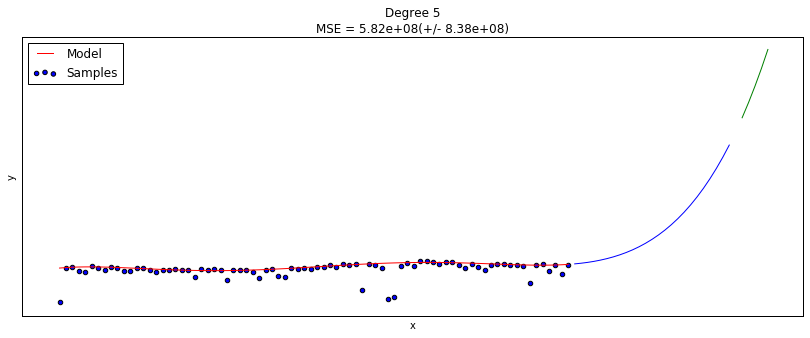

In [27]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation

from sklearn import linear_model

from sklearn.linear_model import Ridge
from scipy.stats import norm
import scipy as sp


def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()



degrees = [5]


# Train Data 80% Validation 20%
y=weekly_data['#_of_parking'].values[:80]
X=np.arange(0,len(y))
y_validate=weekly_data['#_of_parking'].values[80:]
X_validate=np.arange(80,80+len(y_validate))


# Test Data 5week
y_testing=weekly_data_test['#_of_parking'].values
X_testing=np.arange(0,len(y_testing))


#---------- Robustly fit linear model with RANSAC algorithm
# model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())

    
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("robust_linear_regression", model_ransac)])
    
    # --------- Train Model: X,y
    pipeline.fit(X[:, np.newaxis], y)
 

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    
    # -------- MSE & R2 Score: X_validate, y_validate
    y_reg=pipeline.predict(X[:, np.newaxis])   
    y_validate_reg=pipeline.predict(X_validate[:, np.newaxis])
    inlier_mask = model_ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)  
    
    # Inlier_R2_Score
#     y_r2_true=y[inlier_mask] #True
#     y_r2_predict=y_reg[inlier_mask] #Predict

#     y_r2_true=y_validate[inlier_mask] #True
#     y_r2_predict=y_validate_reg[inlier_mask] #Predict
#     , validate_Inlier_R2=%.2f:    R2(y_r2_predict,y_r2_true)
    print('RANSAC+PolynomialDegree:%d, validate_rmse=%.2f, validate_R2=%.2f, train_R2=%.2f' %
      (degrees[i],
        rmse(y_validate_reg, y_validate),
       R2(y_validate_reg, y_validate),
       R2(y_reg, y)))
    
    #----------Predict future 5 weeks: X_5w
    X_5w = np.arange(106,111)
    y_predict_5w = pipeline.predict(X_5w[:, np.newaxis]) 
    # y_testing = array([  3088, 124153, 141431, 130310, 133179])
    
    
    print('Predict_5w RANSAC+PolynomialDegree:%d, predict_rmse=%.2f, predict_R2=%.2f' %
      (degrees[i],
        rmse(y_predict_5w, y_testing),
       R2(y_predict_5w, y_testing)))
    
    
    #----------    
    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.plot(X_validate, y_validate_reg,'-b')
    plt.plot(X_5w, y_predict_5w, '-g')
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


## Try: 11. Polynomial+Ridge

Automatically created module for IPython interactive environment
RANSAC+PolynomialDegree:5, validate_rmse=93191.49, validate_R2=-146.50, train_R2=0.51
Predict_5w RANSAC+PolynomialDegree:5, predict_rmse=341096.60, predict_R2=-42.08


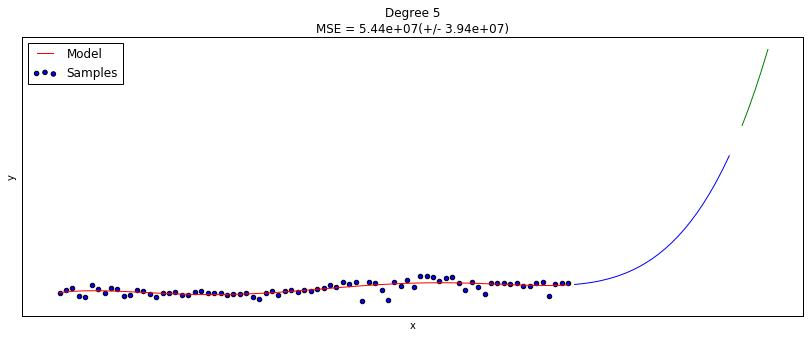

In [131]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

from scipy.stats import norm
import scipy as sp


def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y) ** 2))
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()



degrees = [5]

# Origin Data
# Train Data 80% Validation 20%
y=weekly_data['#_of_parking'].values[:80]
X=np.arange(0,len(y))
y_validate=weekly_data['#_of_parking'].values[80:]
X_validate=np.arange(80,80+len(y_validate))

# Preprocessed Data
# y=df_test['count'].values[:80]
# X=np.arange(0,len(y))
# y_validate=df_test['count'].values[80:]
# X_validate=np.arange(80,80+len(y_validate))


# Test Data 5week
y_testing=weekly_data_test['#_of_parking'].values
X_testing=np.arange(0,len(y_testing))


#---------- Robustly fit linear model with RANSAC algorithm
# model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    
    #-------------------
#     for degree in [3, 4, 5]:
#     model = make_pipeline(PolynomialFeatures(degree), Ridge())
#     model.fit(X, y)
#     y_plot = model.predict(X_plot)
#     plt.plot(x_plot, y_plot, label="degree %d" % degree)
    #-------------------
    
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    
#     model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())

    
#     pipeline = Pipeline([("polynomial_features", polynomial_features),
#                          ("Ridge_regression", Ridge)])
    
#     alphas = [0.0, 1e-8, 1e-5, 1e-1]
    pipeline = make_pipeline(PolynomialFeatures(degrees[i]), Ridge(alpha=0.0))
    
    # --------- Train Model: X,y
    pipeline.fit(X[:, np.newaxis], y)
 

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    
    # -------- MSE & R2 Score: X_validate, y_validate
    y_reg=pipeline.predict(X[:, np.newaxis])   
    y_validate_reg=pipeline.predict(X_validate[:, np.newaxis])
    inlier_mask = model_ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)  
    
    # Inlier_R2_Score
#     y_r2_true=y[inlier_mask] #True
#     y_r2_predict=y_reg[inlier_mask] #Predict

#     y_r2_true=y_validate[inlier_mask] #True
#     y_r2_predict=y_validate_reg[inlier_mask] #Predict
#     , validate_Inlier_R2=%.2f:    R2(y_r2_predict,y_r2_true)
    print('RANSAC+PolynomialDegree:%d, validate_rmse=%.2f, validate_R2=%.2f, train_R2=%.2f' %
      (degrees[i],
        rmse(y_validate_reg, y_validate),
       R2(y_validate_reg, y_validate),
       R2(y_reg, y)))
    
    #----------Predict future 5 weeks: X_5w
    X_5w = np.arange(106,111)
    y_predict_5w = pipeline.predict(X_5w[:, np.newaxis]) 
    # y_testing = array([  3088, 124153, 141431, 130310, 133179])
    
    
    print('Predict_5w RANSAC+PolynomialDegree:%d, predict_rmse=%.2f, predict_R2=%.2f' %
      (degrees[i],
        rmse(y_predict_5w, y_testing),
       R2(y_predict_5w, y_testing)))
    
    
    #----------    
    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.plot(X_validate, y_validate_reg,'-b')
    plt.plot(X_5w, y_predict_5w, '-g')
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


## 预处理

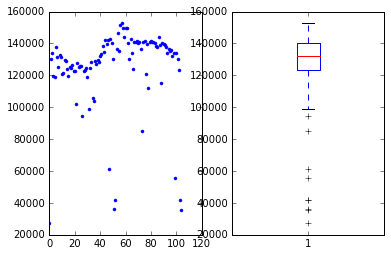

[27158 94735 61188 35945 41826 85320 55360 42041 35434]


In [90]:
# Plot Weekly Data
w=np.arange(0,105,1)

plt.figure(1)
plt.subplot(121)
plt.plot(w,weekly_data['#_of_parking'],'.b')

plt.subplot(122)
# 1. outlier
r=plt.boxplot(weekly_data['#_of_parking'])   
plt.show()

bottom_points = r["fliers"][0].get_data()[1]
print bottom_points

# Just 9 outliers seems Not enough 

In [91]:
# Find Outliers Index

thresh=118000
weekly_data[weekly_data['#_of_parking']<thresh]['#_of_parking']

Year  Week#
2014  1         27158
      22       101839
      27        94735
      32        98816
      35       105615
      36       103613
      48        61188
      52        35945
2015  1         41826
      22        85320
      27       111976
      37       115230
      48        55360
      52        42041
      53        35434
Name: #_of_parking, dtype: int64

In [92]:
# Test data
data = { '#':np.arange(0,105,1) , 'count':weekly_data['#_of_parking'] }
df_test = pd.DataFrame(data)

In [93]:
# Moving average
step=5
for i in df_test[df_test['count']<thresh]['#']:
    if i<len(df_test)-step:
        df_test.iloc[i,1]=np.mean(df_test.iloc[(i+1):(i+step),1])
    else:
        df_test.iloc[i,1]=np.mean(df_test.iloc[(i-step):i,1])

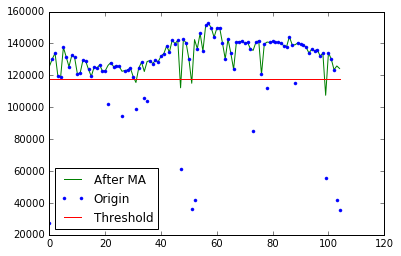

In [94]:
plt.plot(w,df_test['count'],'-g', label='After MA')
plt.plot(w,weekly_data['#_of_parking'],'.b', label='Origin')
y=[thresh]*len(w)
plt.plot(w,y,'-r', label='Threshold')
plt.legend(loc='best')

In [95]:
df_test.head()

#      count
Year Week#              
2014 1      0  125712.25
     2      1  130244.00
     3      2  133918.00
     4      3  119845.00
     5      4  118842.00

## 12. Final: Ridge on Preprocessed Weekly Data

In [137]:
# https://www.coursera.org/learn/ml-regression/lecture/b1fbX/balancing-fit-and-magnitude-of-coefficients 

import graphlab
import math
import random
print 'done'

done


In [138]:
# Put data into an SFrame to manipulate later
# y_ridge=weekly_data['#_of_parking'].values
# X_ridge=np.arange(0,len(y_ridge))

y_ridge=df_test['count'].values
X_ridge=np.arange(0,len(y_ridge))

data = graphlab.SFrame({'X1':X_ridge,'Y':y_ridge})
data

X1,Y
0,125712.25
1,130244.0
2,133918.0
3,119845.0
4,118842.0
5,137606.0
6,131575.0
7,125439.0
8,132509.0
9,131344.0


In [46]:
len(X_ridge)

105

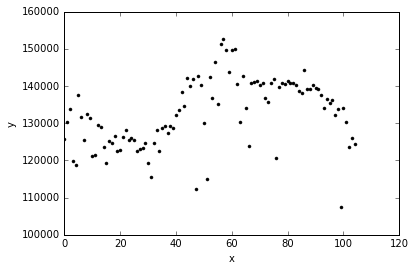

In [99]:
# Create a function to plot the data, since we'll do it many times
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [140]:
# Define some useful polynomial regression functions

# Define a function to create our features for a polynomial regression model of any degree:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

# Define a function to fit a polynomial linear regression model of degree "deg" to the data in "data":
def polynomial_regression(data, deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=0.,l1_penalty=0.,
                                              validation_set=None,verbose=False)
    return model

# Define function to plot data and predictions made, since we are going to use it many times.
def plot_poly_predictions(data, model):
    plot_data(data)

    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
#     x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    x_pred = graphlab.SFrame({'X1':[i/1.0 for i in range(105)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    # plot predictions
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
#     plt.axis([0,1,-1.5,2])

# Create a function that prints the polynomial coefficients in a pretty way :)
def print_coefficients(model):    
    # Get the degree of the polynomial
    deg = len(model.coefficients['value'])-1

    # Get learned parameters as a list
    w = list(model.coefficients['value'])

    # Numpy has a nifty function to print out polynomials in a pretty way
    # (We'll use it, but it needs the parameters in the reverse order)
    print 'Learned polynomial for degree ' + str(deg) + ':'
    w.reverse()
    print np.poly1d(w)

Learned polynomial for degree 2:
        2
-3.614 x + 499.4 x + 1.199e+05


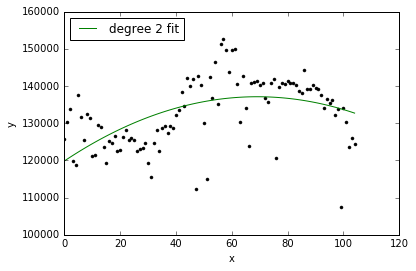

In [100]:
# Fit a degree-2 polynomial
# Fit our degree-2 polynomial to the data generated above:
model = polynomial_regression(data, deg=2)
print_coefficients(model)
plot_poly_predictions(data,model)


Learned polynomial for degree 4:
          4          3         2
0.001044 x - 0.3963 x + 38.81 x - 988.6 x + 1.313e+05


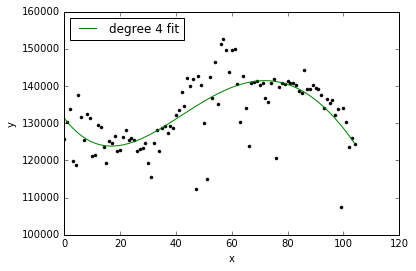

In [101]:
# Fit a degree-4 polynomial
model = polynomial_regression(data, deg=4)
print_coefficients(model)
plot_poly_predictions(data,model)

Learned polynomial for degree 8:
           8             7             6           5         4
4.576e-09 x - 1.875e-06 x + 0.0003086 x - 0.02594 x + 1.169 x
          3         2
 - 27.09 x + 289.8 x - 1285 x + 1.291e+05


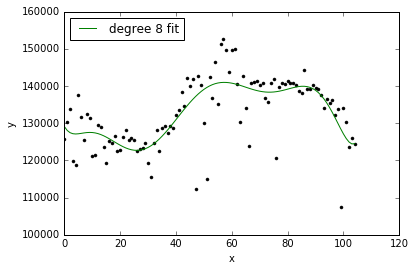

In [102]:
# Fit a degree-16 polynomial
model = polynomial_regression(data, deg=8)
print_coefficients(model)
plot_poly_predictions(data,model)

In [66]:
# Ridge Regression
# Define our function to solve the ridge objective for a polynomial regression model of any degree:
def polynomial_ridge_regression(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), 
                                              target='Y', l2_penalty=l2_penalty,
                                              validation_set=None,verbose=False)
    return model


In [103]:
# Perform a ridge fit of a degree-16 polynomial using a very small penalty strength
model = polynomial_ridge_regression(data, deg=8, l2_penalty=1e-25)
print_coefficients(model)

Learned polynomial for degree 8:
           8             7             6           5         4
4.576e-09 x - 1.875e-06 x + 0.0003086 x - 0.02594 x + 1.169 x
          3         2
 - 27.09 x + 289.8 x - 1285 x + 1.291e+05


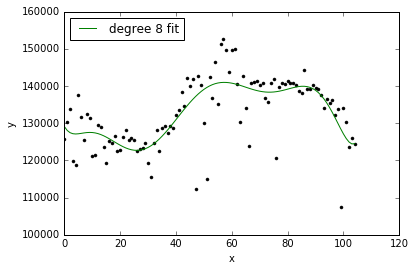

In [104]:
plot_poly_predictions(data,model)

In [105]:
# Perform a ridge fit of a degree-16 polynomial using a very large penalty strength
model = polynomial_ridge_regression(data, deg=8, l2_penalty=100)
print_coefficients(model)

Learned polynomial for degree 8:
            8             7             6             5             4
-2.318e-13 x - 1.688e-11 x - 9.352e-10 x - 5.628e-09 x + 9.251e-06 x
             3          2
 + 0.001907 x + 0.2587 x + 22.45 x + 1.307e+05


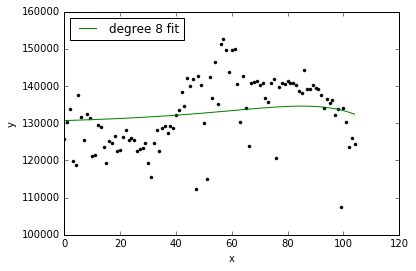

In [106]:
plot_poly_predictions(data,model)

lambda = 1.00e-25
Learned polynomial for degree 8:
           8             7             6           5         4
4.576e-09 x - 1.875e-06 x + 0.0003086 x - 0.02594 x + 1.169 x
          3         2
 - 27.09 x + 289.8 x - 1285 x + 1.291e+05


lambda = 1.00e-10
Learned polynomial for degree 8:
           8            7             6          5         4         3
4.492e-09 x - 1.84e-06 x + 0.0003026 x - 0.0254 x + 1.142 x - 26.33 x
          2
 + 278.9 x - 1221 x + 1.29e+05


lambda = 1.00e-06
Learned polynomial for degree 8:
           8             7             6             5           4
1.435e-10 x - 6.161e-08 x + 7.137e-06 x + 0.0001519 x - 0.08318 x
          3         2
 + 5.638 x - 133.3 x + 846.6 x + 1.27e+05


lambda = 1.00e-03
Learned polynomial for degree 8:
            8             7             6             5           4
-2.215e-11 x + 2.448e-09 x + 2.084e-07 x - 1.124e-05 x - 0.00293 x
             3         2
 - 0.006176 x + 26.13 x - 834.3 x + 1.308e+05


lambda = 1.0

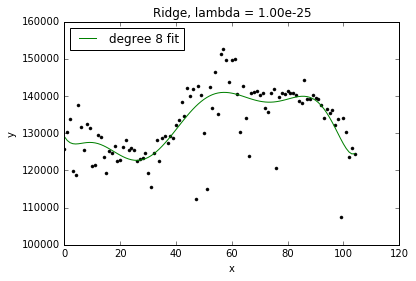

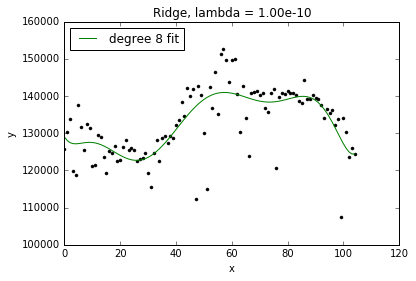

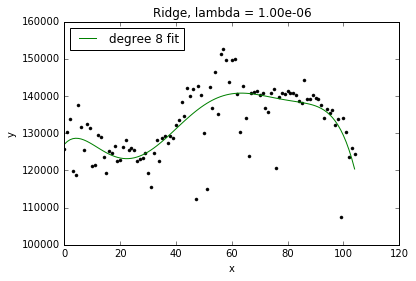

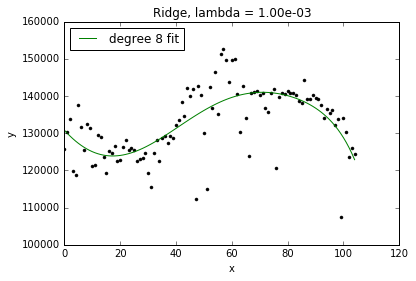

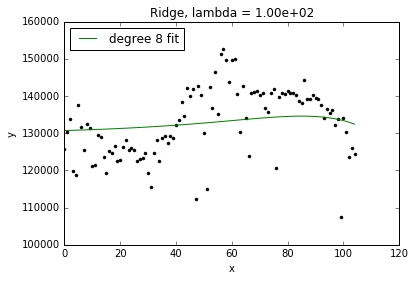

In [128]:
# Let's look at fits for a sequence of increasing lambda values
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = polynomial_ridge_regression(data, deg=8, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_poly_predictions(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)


In [73]:
# Perform a ridge fit of a degree-16 polynomial using a "good" penalty strength
# LOO cross validation -- return the average MSE
def loo(data, deg, l2_penalty_values):
    # Create polynomial features
    data = polynomial_features(data, deg)
    
    # Create as many folds for cross validatation as number of data points
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    # for each value of l2_penalty, fit a model for each fold and compute average MSE
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            # train model
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            # predict on validation set 
            y_test_predicted = model.predict(validation_set)
            # compute squared error
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        # save squared error in list of MSE for each l2_penalty
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [108]:
# 30'
l2_penalty_values = np.logspace(-4, 10, num=10)
l2_penalty_mse,best_l2_penalty = loo(data, 8, l2_penalty_values)
print 'ok'

ok


done


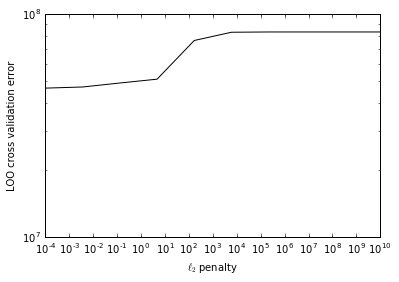

In [109]:
plt.plot(l2_penalty_values,l2_penalty_mse,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')
print 'done'

In [110]:
best_l2_penalty

0.0001

In [141]:
model = polynomial_ridge_regression(data, deg=8, l2_penalty=best_l2_penalty)
print_coefficients(model)

Learned polynomial for degree 8:
            8             7            6             5            4
-6.675e-11 x + 8.256e-09 x + 5.87e-07 x - 5.677e-05 x - 0.008141 x
           3         2
 + 0.6506 x + 4.804 x - 633 x + 1.306e+05


### Final

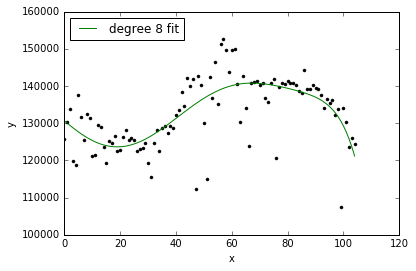

In [112]:
plot_poly_predictions(data,model)

用80个数据和用105个数据，deg不同

In [150]:
# model = polynomial_ridge_regression(data[:80], deg=4, l2_penalty=best_l2_penalty)
# print_coefficients(model)

In [149]:
# plot_poly_predictions(data[:80],model)

In [ ]:
y=[]
for x in np.arange(105,110,1):
    y.append(-1.026e-10*(x**8) 

In [ ]:
plot_poly_predictions(data,model)

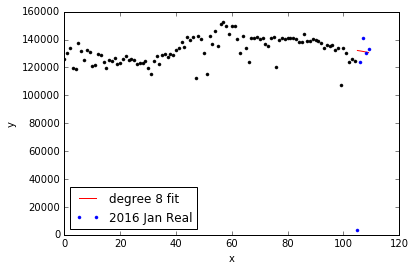

In [130]:
plot_data(data)

    # Get the degree of the polynomial
deg = len(model.coefficients['value'])-1
    
    # Create 200 points in the x axis and compute the predicted value for each point
#     x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
x_pred_p = graphlab.SFrame({'X1':[i/1.0 for i in np.arange(105,110,1)]})
y_pred_p = model.predict(polynomial_features(x_pred_p,deg))
    
    # plot predictions
plt.plot(x_pred_p['X1'], y_pred_p, 'r-', label='degree ' + str(deg) + ' fit')

y_test_5w=weekly_data_test['#_of_parking'].values
plt.plot(x_pred_p['X1'], y_test_5w, '.b', label='2016 Jan Real')
plt.legend(loc='best')

In [82]:
# # Lasso Regression
# def polynomial_lasso_regression(data, deg, l1_penalty):
#     model = graphlab.linear_regression.create(polynomial_features(data,deg), 
#                                               target='Y', l2_penalty=0.,
#                                               l1_penalty=l1_penalty,
#                                               validation_set=None, 
#                                               solver='fista', verbose=False,
#                                               max_iterations=3000, convergence_threshold=1e-10)
#     return model

In [148]:
# # Explore the lasso solution as a function of a few different penalty strengths
# for l1_penalty in [0.0001, 0.01, 0.1, 10]:
#     model = polynomial_lasso_regression(data, deg=8, l1_penalty=l1_penalty)
#     print 'l1_penalty = %e' % l1_penalty
#     print 'number of nonzeros = %d' % (model.coefficients['value']).nnz()
#     print_coefficients(model)
#     print '\n'
#     plt.figure()
#     plot_poly_predictions(data,model)
#     plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % (l1_penalty, (model.coefficients['value']).nnz()))

## 13. Weekly Predicted -> Daily -> Hourly

In [ ]:
# Take y_pred_p as final prediction

x_pred_p = graphlab.SFrame({'X1':[i/1.0 for i in np.arange(105,110,1)]})
y_pred_p = model.predict(polynomial_features(x_pred_p,deg))

In [151]:
# Objective

# [2016-02-01 00:00:00, 2016-02-01 01:00:00, ..., 2016-02-29 23:00:00]

#  hour, occupancy
#  2016-02-01 00:00:00, 100
#  2016-02-01 01:00:00, 125
#  ...

In [ ]:
# Input date period 
start='2016-02-01'
end='2016-02-29'

# week#

# Find 2014, 2015 same week#

# 2014,2015 week average

# week ratio list[1.2, 1.4, 1.6, 0.9]

# 2014,2015 week average: daily_hourly*ratio

# choose relative same weekday date

